# ML1 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

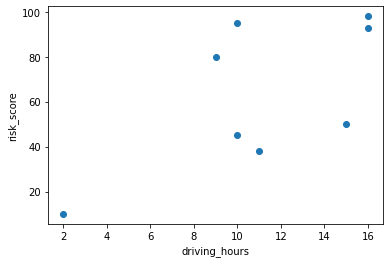

In [2]:
X = np.array([10, 9, 2, 15, 10, 16, 11, 16])
Y = np.array([95, 80, 10, 50, 45, 98, 38, 93])
plt.xlabel('driving_hours')
plt.ylabel('risk_score')
plt.scatter(x=X,y=Y)

In [3]:
def calc(X,Y):
    X_Mean = X.mean()
    Y_Mean = Y.mean()
    coef = (sum((X-X_Mean)*(Y-Y_Mean))/sum((X-X_Mean)**2))
    intercept  = Y_Mean - coef * X_Mean
    print(f"Equation : Y = {coef}X + {intercept}")

    X_pred = X
    Y_pred = coef * X + intercept
    plt.xlabel('driving_hours')
    plt.ylabel('risk_score')
    plt.scatter(x=X,y=Y)
    plt.plot(X,Y_pred, color = 'RED')
    plt.show()

Equation : Y = 4.58789860997547X + 12.584627964022893


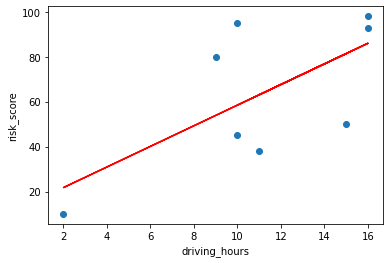

In [4]:
calc(X,Y)

# ML 2

In [5]:
import numpy as np
import pandas as pd 
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

In [6]:
dataset = [
    ['<21', 'High', 'Male', 'Single', 'No'],
    ['<21', 'High', 'Male', 'Married', 'No'],
    ['21-35', 'High', 'Male', 'Single', 'Yes'],
    ['>35', 'Medium', 'Male', 'Single', 'Yes'],
    ['>35', 'Low', 'Female', 'Single', 'Yes'],
    ['>35', 'Low', 'Female', 'Married', 'No'],
    ['21-35', 'Low', 'Female', 'Married', 'Yes'],
    ['<21', 'Medium', 'Male', 'Single', 'No'],
    ['<21', 'Low', 'Female', 'Married', 'Yes'],
    ['>35', 'Medium', 'Female', 'Single', 'Yes'],
    ['<21', 'Medium', 'Female', 'Married', 'Yes'],
    ['21-35', 'Medium', 'Male', 'Married', 'Yes'],
    ['21-35', 'High', 'Female', 'Single', 'Yes'],
    ['>35', 'Medium', 'Male', 'Married', 'No']
]
columns = ['Age', 'Income', 'Gender', 'Marital Status', 'Buys']


In [8]:
data = pd.DataFrame(dataset,columns=columns)

In [9]:
le = LabelEncoder()
data = data.apply(le.fit_transform)

x = data.iloc[:, : -1] # exclude last column (buys)
y = data.iloc[:, -1]

In [10]:
dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(x,y)
# Age = 1, Income = 1, Gender = 0, Marital Status = 0
pred = dt_classifier.predict([[1, 1, 0, 0]])
pred[0]

C:\Users\Sanwal\anaconda3\envs\tensorflow\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"


1

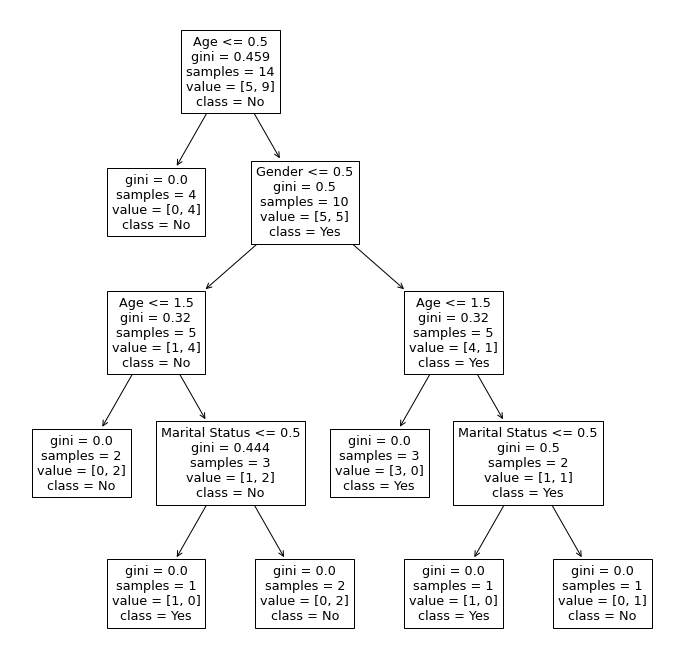

In [12]:
plt.figure(figsize=(12,12))
pt = plot_tree(
    decision_tree = dt_classifier,
    feature_names = data.columns,
    class_names = ["Yes", "No"]
)
plt.show()

# MP3

In [13]:
import numpy as np

In [14]:
class kNN:
  def __init__(self, k):
    self.k = k
    self.X = []
    self.y = []

  def fit(self, X, y):
    self.X = self.X + X
    self.y = self.y + y

  def __distance(self, x, y):
    return (x[0] - y[0]) ** 2 + (x[1] - y[1]) ** 2

  def __get_class(self, X):
    distances = []
    for i in range(len(self.X)):
      distances.append((self.__distance(X, self.X[i]), self.y[i]))
    distances.sort()
    distances = distances[:self.k]
    counts = {}
    for d in distances:
      try: counts[d[1]] += 1
      except: counts[d[1]] = 1
    return max(counts, key = lambda i: counts[i])

  def predict(self, X):
    preds = []
    for x in X:
      preds.append(self.__get_class(x))
    return preds

  def __get_weighted_class(self, X):
    distances = []
    for i in range(len(self.X)):
      distances.append((self.__distance(X, self.X[i]), self.y[i]))
    distances.sort()
    distances = distances[:self.k]
    counts = {}
    for d in distances:
      try: counts[d[1]] += 1 / d[0]
      except: counts[d[1]] = 1 / d[0]
    return max(counts, key = lambda i: counts[i])

  def predict_weighted(self, X):
    preds = []
    for x in X:
      preds.append(self.__get_weighted_class(x))
    return preds

  def __get_locally_weighted_average_class(self, X):
    distances = []
    for i in range(len(self.X)):
      distances.append((self.__distance(X, self.X[i]), self.y[i]))
    distances.sort()
    distances = distances[:self.k]
    counts = {}
    for d in distances:
      try: counts[d[1]].append(1 / d[0])
      except: counts[d[1]] = [1 / d[0]]
    for c in counts:
      counts[c] = np.mean(counts[c])
    return max(counts, key = lambda i: counts[i])

  def predict_locally_weighted_average(self, X):
    preds = []
    for x in X:
      preds.append(self.__get_weighted_class(x))
    return preds

In [15]:
X = [
     (2, 4),
     (4, 6),
     (4, 4),
     (4, 2),
     (6, 4),
     (6 ,2)
]
y = ['Y', 'Y', 'B', 'Y', 'Y', 'B']

In [16]:
model = kNN(3)


In [17]:
model.fit(X, y)

In [18]:
print(f'Standard k-NN: {model.predict([(6, 6)])}')

Standard k-NN: ['Y']


In [19]:
print(f'Distance Weighted k-NN: {model.predict_weighted([(6, 6)])}')

Distance Weighted k-NN: ['Y']


In [20]:
print(f'Locally Weighted Average k-NN: {model.predict_locally_weighted_average([(6, 6)])}')

Locally Weighted Average k-NN: ['Y']


# ML4

In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
P1=[0.1,0.6]
P2=[0.15,0.71]
P3=[0.08,0.9] 
P4=[0.16, 0.85] 
P5=[0.2,0.3]
P6=[0.25,0.5]
P7=[0.24,0.1]
P8=[0.3,0.2]
K=2

points=[P1,P2,P3,P4,P5,P6,P7,P8]

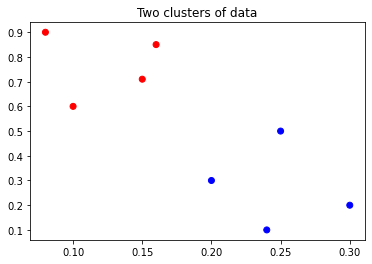

In [5]:
from sklearn.cluster import KMeans

# Configuration options
num_samples_total = 8
cluster_centers = [(0.1,0.6), (0.3, 0.2)]
num_classes = len(cluster_centers)

X = np.array(points)

# Fit K-means with Scikit
kmeans = KMeans(init='k-means++', n_clusters=num_classes)
kmeans.fit(X)

# Predict the cluster for all the samples
P = kmeans.predict(X)

# Generate scatter plot for training data
colors = list(map(lambda x: 'blue' if x == 1 else 'red', P))
plt.scatter(X[:,0], X[:,1], c=colors, marker="o", picker=True)
plt.title('Two clusters of data')
plt.show()

# ICS 4 RSA

In [24]:
class RSA : 
    def __init__(self, p, q):
        self.N = p * q
        self.product = (p - 1) * (q - 1)
        self.generate_keys()

    def generate_keys(self) :
        for i in range(1, 999999) :
            if (self.product % i != 0):
                self.E = i                
                break

        for i in range(1,self.product-1):
            if(((i * self.E) % self.product) == 1):
                self.D = i
                break

        print('Encryption Key : {}'.format(self.E))
        print('Decryption Key : {}'.format(self.D))

    def encrypt(self, text) :
        pt = []
        ct = []
        for i in text:
            pt.append(ord(i))
    
        for i in pt:
            ct.append((i ** self.E) % self.N)

        return ct

    def decrypt(self, cipher) :
        dt = []
        for i in cipher:
            dt.append(chr(((i ** self.D) % self.N)))

        return ''.join(dt)


if __name__ ==  "__main__" :
    p, q = (13,11)
    print('Generated Primes are p = {}, q = {}'.format(p,q))
    rsa = RSA(p, q)
    text = input('Enter text to encrypt : ')
    ct = rsa.encrypt(text)
    print('Encrypted text : {}'.format(ct))
    
    print("--------\n Decrypting the encrypted text...")
    decrypted_text = rsa.decrypt(ct)
    print('Decrypted Message : {}'.format(decrypted_text))

Generated Primes are p = 13, q = 11
Encryption Key : 7
Decryption Key : 103
Enter text to encrypt : sum
Encrypted text : [80, 39, 21]
--------
 Decrypting the encrypted text...
Decrypted Message : sum


# ICS 3 DIFFIE HELLLMAN KEY EXCHANGE


In [26]:
import random

def generate(n, g):
  print("Diffie-Hellman Key Exchange\n")

  print("Modulus chosen:", n)
  print("Base chosen:", g)

  # Choose random numbers
  a = random.randint(2, 1000)
  b = random.randint(2, 1000)

  print("Number chosen by A:", a)
  print("Number chosen by B:", b)

  print("\nCalculating shared keys for both A and B\n")
  A = pow(g, a) % n
  B = pow(g, b) % n

  print("A's calculated value:", A)
  print("B's calculated value:", B)

  # Exchange calculated values
  print("\nExchanging calculated values\n")
  k1 = pow(B, a) % n
  k2 = pow(A, b) % n

  print("A's secret key:", k1)
  print("B's secret key:", k2)


generate(
    int(input("Enter modulus: ")),
    int(input("Enter base: "))
)

Enter modulus: 7
Enter base: 5
Diffie-Hellman Key Exchange

Modulus chosen: 7
Base chosen: 5
Number chosen by A: 843
Number chosen by B: 900

Calculating shared keys for both A and B

A's calculated value: 6
B's calculated value: 1

Exchanging calculated values

A's secret key: 1
B's secret key: 1


# ICS 2 ECC

In [28]:
import math
import random

In [31]:
def generator(a,b): 
    x=1 
    while True: 
        rhs = x**3 + a*x +b 
        y = int(math.sqrt(rhs)) 
        lhs = y**2 
        if(lhs == rhs): 
            return x ,y 
        else: 
            x = x+1

In [32]:
### point on the Cureve
a= 3#input(int("Point a"))
b= 4#input(int("Point b"))
m = 35 #input(int("Inpute integer"))
G = generator(a,b)

In [34]:
pri_a = 15
pri_b = 19

pub_a = [pri_a * G[0] ,pri_a * G[1] ]
pub_b = [pri_b * G[0] ,pri_b * G[1] ]

k = random.randint(0, 10)

In [35]:
c1 = k*(G[0]+G[1])
c2 = m + ((k*pub_b[0]) + (k*pub_b[1]))
print([c1,c2])

r= pri_b*c1
p = c2-r
print(p)



[119, 2296]
35


# ICS 1 SDES

In [6]:
FIXED_IP = [2, 6, 3, 1, 4, 8, 5, 7]
FIXED_EP = [4, 1, 2, 3, 2, 3, 4, 1]
FIXED_IP_INVERSE = [4, 1, 3, 5, 7, 2, 8, 6]
FIXED_P10 = [3, 5, 2, 7, 4, 10, 1, 9, 8, 6]
FIXED_P8 = [6, 3, 7, 4, 8, 5, 10, 9]
FIXED_P4 = [2, 4, 3, 1]

S0 = [[1, 0, 3, 2],
      [3, 2, 1, 0],
      [0, 2, 1, 3],
      [3, 1, 3, 2]]

S1 = [[0, 1, 2, 3],
      [2, 0, 1, 3],
      [3, 0, 1, 0],
      [2, 1, 0, 3]]

KEY = '0111111101'

In [7]:
def permutation(bits,fixed_key):
    new = ''
    for k in fixed_key:
        new+=bits[k-1]
    return new

def left_half(bits):
    return bits[:int(len(bits)/2)]

def right_half(bits):
    return bits[int(len(bits)/2):]

def shift(bits):
    left = left_half(bits)[1:] + left_half(bits)[0]
    right = right_half(bits)[1:] + right_half(bits)[0]
    return left+right

def key1():
    return permutation(shift(permutation(KEY,FIXED_P10)),FIXED_P8)

def key2():
    return permutation(shift(shift(shift(permutation(KEY,FIXED_P10)))),FIXED_P8)

def xor(bits,key):
    new = ''
    for i in range(len(bits)):
        new+= str(int(bits[i]) ^ int(key[i]))
    return new

def lookup_table(bits,table) :
    row = int(bits[0]+bits[3],2)
    col = int(bits[1]+bits[2],2)
    return '{0:02b}'.format(table[row][col])

def fk(bits,key):
    L = left_half(bits)
    R = right_half(bits)
    bits = permutation(R,FIXED_EP)
    bits = xor(bits,key)
    bits = lookup_table(left_half(bits),S0) + lookup_table(right_half(bits),S1)
    bits = permutation(bits,FIXED_P4)
    return xor(bits,L)
    
def encrypt(msg):
    bits = permutation(msg,FIXED_IP)
    temp = fk(bits,key1())
    bits = right_half(bits) + temp
    bits = fk(bits,key2())
    return permutation(bits+temp,FIXED_IP_INVERSE)
    
    
def decrypt(ciphertext):
    bits = permutation(ciphertext,FIXED_IP)
    temp = fk(bits,key2())
    bits = right_half(bits) + temp
    bits = fk(bits,key1())
    return permutation(bits+temp,FIXED_IP_INVERSE)

In [8]:
msg = '11101010'
ciphertext = encrypt(msg)

print('Encrypted text is ',ciphertext)

decrypted = decrypt(ciphertext)
print('Decrypted text is ',decrypted)

Encrypted text is  10100010
Decrypted text is  11101010
